In [1]:
import bd
import pickle
import numpy as np
from Point import Point
from Limb import Limb

import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
#constants
ratio = 2
black = (0,0,0)
red = (1,0,0)
width, height = 1000, 1000

#to keep
l_arm = True
r_arm = True
l_leg = True
r_leg = True
neck = True
general = True

to_keep = [l_arm, r_arm, l_leg, r_leg, neck, general]

In [3]:
myPaintings = pickle.load(open('../../Python Scripts/myPaintings21400.p', 'rb'))[:21401]


## HERE go buc corrections to the catalog, which are numerous.... 
myPaintings[7465][1] = 'http://www.wga.hu/art/c/casa/portrait_C.jpg' ## and NOT portrait_c (lowercase), the original...

filtered_paintings = bd.filter_paintings(myPaintings)

print len(myPaintings)
print len(filtered_paintings)

21401
14896


In [4]:
#6 seconds in my computer
all_bodies = bd.construct_body_list(21400, myPaintings)
filtered_bodies = bd.filter_bodies(all_bodies)

print len(all_bodies)
print len(filtered_bodies)

69471
48689


In [5]:
all_relative_angles = bd.all_relative_angles(all_bodies)
deviation = bd.compute_std_deviation(all_relative_angles)

In [6]:
ll = bd.all_bodies_mean_limb_length(all_bodies)  * np.array(ratio)
ml = bd.middle_mean_length(all_bodies) * ratio

In [7]:
resized_bodies = bd.resize_bodies(all_bodies, ml)
mlb = bd.middle_mean_length(resized_bodies)

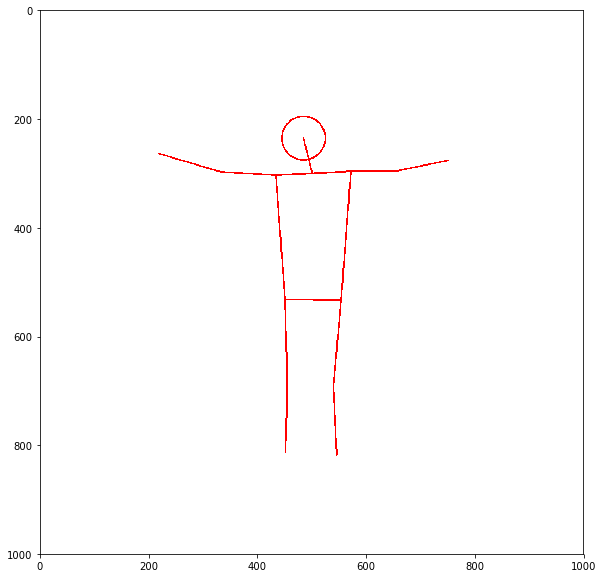

In [8]:


body_id = 3525
img = np.ones((height, width, 3))


resized_bodies[body_id].draw(img, red)


plt.imshow(img)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

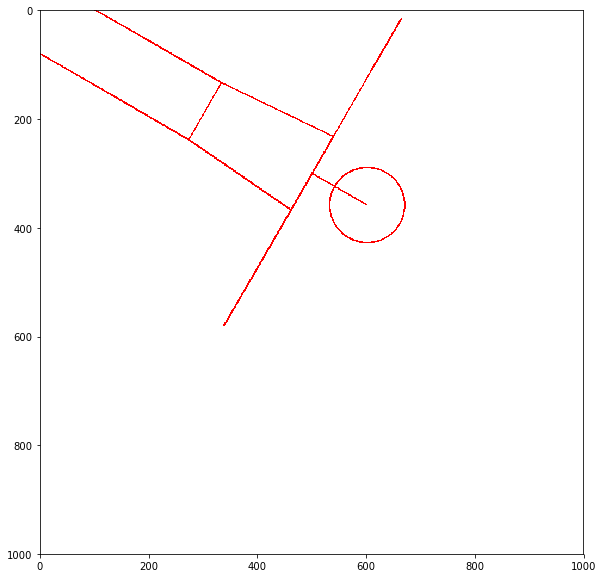

In [9]:
img = np.ones((height, width, 3))
base_body = bd.angles_to_body(bd.angles(), ll, Point(500,300))

base_body.rotate(120)
base_body.draw(img, red)


plt.imshow(img)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 10)

In [10]:
d,i = bd.get_n_nearest_neighbor(all_relative_angles, base_body, deviation, to_keep, n=100, dist=50)
print i

13.0570001602
1.11599993706
[[31707 42099 14187 15582 47731 48445 32420  7310 28851 40106 42298 43603
  47995 14234 56145 64670 56459 32912 57746 48200 48169 68406 27144 26027
  16468 15503  8206  9183 52372  3525  1573 29811 27768 38196  2328 16894
  32806 25590 11725 32442 17313 42997 52373 61570  4650 65465  3417 21595
  56796  6899  8914 52562 51070 22559 30645 40454  7063 20827 40715 48539
  50296  3594  3418 28832 58983 20169 40971 59290 67803 52377 19552 41662
  29388 53583 51687 13112 65985 45444 63647  6651 52500 29146 23744  9737
  58981  5006 28723  5637  2339  7131 10093 57396  7092 23997   720 52375
  13483  3601 41737 23995]]


In [17]:
#to change the number of random paintings, change n
import time
n = 100
t = time.time()
bd.p_values_random_hypothesis(n, myPaintings, all_bodies, all_relative_angles, deviation, approx=True)
print time.time() -t

12.987000227


In [12]:
import bqplot as bqp


def interactive_body(body, l_arm = True, r_arm = True, l_leg = True, r_leg = True, neck_p = True, general = True):
    """Plot an interactive body with which we can play."""
    
    middle = Limb(body.pts[9], body.pts[13]).middle()
    to_keep=list()
    if l_arm:
        to_keep.append(body.pts[3].to_array())
        to_keep.append(body.pts[4].to_array())
    if r_arm:
        to_keep.append(body.pts[7].to_array())
        to_keep.append(body.pts[8].to_array())
    if l_leg:
        to_keep.append(body.pts[10].to_array())
        to_keep.append(body.pts[11].to_array())
    if r_leg:
        to_keep.append(body.pts[14].to_array())
        to_keep.append(body.pts[15].to_array())
    if neck_p:
        to_keep.append(body.pts[0].to_array())
    if general:
        to_keep.append(middle.to_array())
        
        
    def refresh(_):
        middle = Limb(body.pts[9], body.pts[13]).middle()
        if (not abs(scat.x[-1] - middle.x) < 10) or (not abs(scat.y[-1] - middle.y)<10):
            o = body.pts[1]
            a = Point(scat.x[-1], scat.y[-1]).angle(o) - middle.angle(o)
            body.rotate(a)
            
            middle = Limb(body.pts[9], body.pts[13]).middle()
            
            i = 0
            if l_arm:
                to_keep[i] = body.pts[3].to_array()
                to_keep[i+1] = body.pts[4].to_array()
                i+=2
            if r_arm:
                to_keep[i] = body.pts[7].to_array()
                to_keep[i+1] = body.pts[8].to_array()
                i+=2
            if l_leg:
                to_keep[i] = body.pts[10].to_array()
                to_keep[i+1] = body.pts[11].to_array()
                i+=2
            if r_leg:
                to_keep[i] = body.pts[14].to_array()
                to_keep[i+1] = body.pts[15].to_array()
                i+=2
            if neck_p:
                to_keep[i] = body.pts[0].to_array()
                i+=1
            if general:
                to_keep[i] = [scat.x[-1], scat.y[-1]]
            
            
            scat.x , scat.y = np.transpose(to_keep)
        
        chest.x, chest.y = np.transpose([body.pts[1].to_array(), body.pts[2].to_array(), body.pts[9].to_array(), \
                                     body.pts[13].to_array(), body.pts[6].to_array(), body.pts[1].to_array()])
        
        i = 0
        to_update = []
        if l_arm:
            left_arm.x, left_arm.y = [[body.pts[2].x, scat.x[i], scat.x[i+1]],[body.pts[2].y, scat.y[i], scat.y[i+1]]]
            to_update.append(3)
            to_update.append(4)
            i+=2
        if r_arm:
            right_arm.x, right_arm.y = [[body.pts[6].x, scat.x[i], scat.x[i+1]],[body.pts[6].y, scat.y[i], scat.y[i+1]]]
            to_update.append(7)
            to_update.append(8)
            i+=2
        if l_leg:
            left_leg.x, left_leg.y = [[body.pts[9].x, scat.x[i], scat.x[i+1]],[body.pts[9].y, scat.y[i], scat.y[i+1]]]
            to_update.append(10)
            to_update.append(11)
            i+=2
        if r_leg:
            right_leg.x, right_leg.y = [[body.pts[13].x, scat.x[i], scat.x[i+1]],[body.pts[13].y, scat.y[i], scat.y[i+1]]]
            to_update.append(14)
            to_update.append(15)
            i+=2
        if neck_p:
            to_update.append(0)
            neck.x, neck.y = [[body.pts[1].x, scat.x[i]],[body.pts[1].y, scat.y[i]]]
            
        
        head.x = np.cos(np.linspace(0, 2*np.pi, 100))*60+body.pts[0].x
        head.y = np.sin(np.linspace(0, 2*np.pi, 100))*65+body.pts[0].y
        
        
        #update body
        for i in range(len(to_update)):
            body.pts[to_update[i]].x = scat.x[i]
            body.pts[to_update[i]].y =  scat.y[i]
        

        base_body.rotate(10).draw(img, red)

        
        return
    
    
    
    scales = {'x': bqp.LinearScale(min= 0, max= 1000),
             'y' : bqp.LinearScale(min = 1000, max = 0)}
    
    marks = []
    
   
    
    #movable points: arms first, left side first
    scat = bqp.Scatter(scales = scales, enable_move = True, update_on_move = True, stroke_width = 7)
    scat.x , scat.y = np.transpose(to_keep)
    marks.append(scat)
    
    #draw the chest
    chest = bqp.Lines(scales=scales)
    chest.x, chest.y = np.transpose([body.pts[1].to_array(), body.pts[2].to_array(), body.pts[9].to_array(), \
                                     body.pts[13].to_array(), body.pts[6].to_array(), body.pts[1].to_array()])
    marks.append(chest)
    
    
    #draw the head
    head = bqp.Lines(scales=scales)
    head.x = np.cos(np.linspace(0, 2*np.pi, 100))*60+body.pts[0].x
    head.y = np.sin(np.linspace(0, 2*np.pi, 100))*65+body.pts[0].y
    marks.append(head)
    
    i = 0
    #draw the left arm
    left_arm = bqp.Lines(scales=scales)
    if l_arm:
        left_arm.x, left_arm.y = [[body.pts[2].x, scat.x[i], scat.x[i+1]],[body.pts[2].y, scat.y[i], scat.y[i+1]]]
        i +=2
    else:
        left_arm.x, left_arm.y = [[body.pts[2].x, body.pts[3].x, body.pts[4].x],[body.pts[2].y, body.pts[3].y, body.pts[4].y]]
    marks.append(left_arm)
    
    
    #draw the right arm
    right_arm = bqp.Lines(scales=scales)
    if r_arm:
        right_arm.x, right_arm.y = [[body.pts[6].x, scat.x[i], scat.x[i+1]],[body.pts[6].y, scat.y[i], scat.y[i+1]]]
        i+=2
    else:
        right_arm.x, right_arm.y = [[body.pts[6].x, body.pts[7].x, body.pts[8].x],[body.pts[6].y, body.pts[7].y,body.pts[8].y]]
    
    marks.append(right_arm)
    
    
    #draw the left leg
    left_leg = bqp.Lines(scales=scales)
    if l_leg:
        left_leg.x, left_leg.y = [[body.pts[9].x, scat.x[i], scat.x[i+1]],[body.pts[9].y, scat.y[i], scat.y[i+1]]]
        i+=2
    else:
        left_leg.x, left_leg.y = [[body.pts[9].x, body.pts[10].x, body.pts[11].x],[body.pts[9].y, body.pts[10].y,body.pts[11].y]]
    marks.append(left_leg)
    
    
    #draw the right leg
    right_leg = bqp.Lines(scales=scales)
    if r_leg:
        right_leg.x, right_leg.y = [[body.pts[13].x, scat.x[i], scat.x[i+1]],[body.pts[13].y, scat.y[i], scat.y[i+1]]]
        i+=2
    else:
        right_leg.x, right_leg.y = [[body.pts[13].x, body.pts[14].x, body.pts[15].x],[body.pts[13].y, body.pts[14].y, body.pts[15].y]]
    marks.append(right_leg)
    
    
    #draw the neck
    neck =  bqp.Lines(scales=scales)
    if neck_p:
        neck.x, neck.y = [[body.pts[1].x, scat.x[i]],[body.pts[1].y, scat.y[i]]]
        i+=1
    else:
        neck.x, neck.y = [[body.pts[1].x, body.pts[0].x],[body.pts[1].y, body.pts[0].y]]
    marks.append(neck)
    
    scat.observe(refresh, names=['x', 'y'])
    
    
    
    return bqp.Figure(marks=marks, padding_y = 0., min_height = 750, min_width = 750)


base_body = bd.angles_to_body(bd.angles(), ll, Point(500,300))
interactive_body(base_body)